En este notebook vamos a utilizar las siguientes librerías:
- Scikit-learn y Scipy para el análisis,
- Mtplotlib para los gráficos.

## Preparando los datos para clustering

Para comenzar, importamos del módulo sklearn.datasets la función __load_iris__ para cargar el dataset iris que vamos a utilizar.

In [15]:
from sklearn.datasets import load_iris

# cargo el dataset
iris = load_iris()


Generalmente, cuando trabajemos con algoritmos de _clustering_, dado que son algoritmos basados en distancias, va a ser fundamental escalar los datos para prescindir de las unidades de medida de las diferentes features. A continuación, escalamos los datos numéricos:

In [16]:
# Importamos dos módulos para escalado, existen más
# scale: Center to the mean and component wise scale to unit variance
# MinMaxScaler:
from sklearn.preprocessing import scale, MinMaxScaler

# scale
scaled_1 = scale(iris.data)

# MinMaxScaler
scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(iris.data)

# Muestro las primeras 5 filas escaladas con scale
print("Escalado con scale:")
print(scaled_1[1:6,])

# Muestro las primeras 5 filas escaladas con Min-Max
print("\nEscalado con Min-Max:")
print(scaled_2[1:6,])


Escalado con scale:
[[-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]]

Escalado con Min-Max:
[[0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]]


## Algoritmo K-Medias

### Entrenando el modelo

Para entrenar un cluster k-means,  debemos importar _KMeans_ del módulo sklearn.cluster.

Este algoritmo posee diferentes hiper-parámetros que se pueden configurar:

- __init:__ es el método de inicialización de los centroides. En este caso definimos _random_ para que se seleccionen aleatoriamente los puntos.

- __n_clusters:__ definine la cantidad N de clústers que queremos como resultado.

- __n_init:__ indica cuantas veces veces va a correr el algoritmo con diferentes centroides.

- __random_state:__ es la semilla de la aleatorización.

Al final de ésta guía, en __Referencias & Recursos Web__ podrás encontrar un enlace a la documentación oficial sobre este tema.

In [17]:
from sklearn.cluster import KMeans

# Por defecto usa la distancia euclidea
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, random_state=0
)

# Para definir una métrica de distancia diferente usar el módulo KMeansClusterer
# kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)

Para realizar el cálculo, ejecutamos el método __fit_predict__ pasando como parámetro el dataset. Éste método realiza el fit y el predict en el mismo momento.

In [18]:
y_km = km.fit_predict(scaled_1)

Esto da como resultado un array con el número de clúster (empieza en 0!) al que pertenece cada observación.

In [19]:
print(y_km)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Ahora vamos a graficar los clústeres, utilizamos Matplotlib. La mejor forma de ver como se comportan los datos es con un gráfico de dispersión (scatter).

La documentación completa de matplotlib.pyplot se puede consultar acá [2].

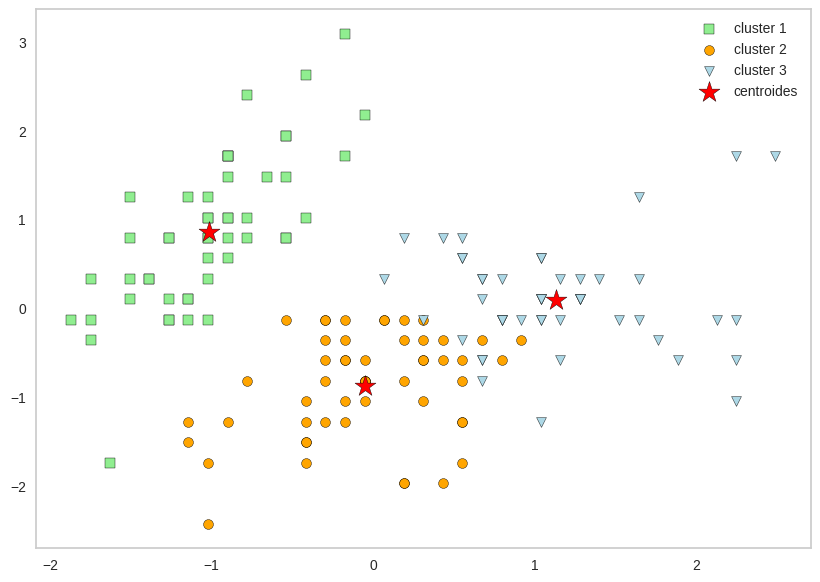

In [20]:
import matplotlib.pyplot as plt

#configuro el tamaño del grafico final
plt.figure(figsize=(10,7))

#scatter del primer cluster
plt.scatter(
    scaled_1[y_km == 0, 0], scaled_1[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
#scatter del segundo cluster
plt.scatter(
    scaled_1[y_km == 1, 0], scaled_1[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
#scatter del tercer cluster
plt.scatter(
    scaled_1[y_km == 2, 0], scaled_1[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
#scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroides'
)
#le pongo la leyenda
plt.legend(scatterpoints=1)
#hace una grilla en el grafico
plt.grid()
#lo imprime en pantalla
plt.show()

## Algoritmos de Clustering Jerárquico

A continuación, vamos a realizar un clustering jerárquico. Para ello vamos a utilizar la librería _scipy_.

Importamos los módulo linkage para el agrupamiento y _dendogram_ para su visualización:


In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Parámetros del Clustering Jerárquico
El método linkage recibe como parámetro los datos y método para el cálculo de distancia.

Los métodos para el cálculo de distancia soportados por _scipy_ son los siguientes:
- single,
- complete,
- average,
- weighted,
- centroid,
- median,
- ward.

Al final de ésta guía, en __Referencias & Recursos Web__ podrás encontrar un enlace a la documentación oficial sobre este tema.

In [22]:
H = linkage(scaled_2, 'single')

Podemos ver la matriz de distancias:

In [23]:
from scipy.spatial.distance import pdist, squareform

squareform(pdist(scaled_2[0:4,]))

array([[0.        , 0.21561354, 0.16810102, 0.21761244],
       [0.21561354, 0.        , 0.10157824, 0.09469862],
       [0.16810102, 0.10157824, 0.        , 0.06047157],
       [0.21761244, 0.09469862, 0.06047157, 0.        ]])

Y también podemos graficar el dendrograma:

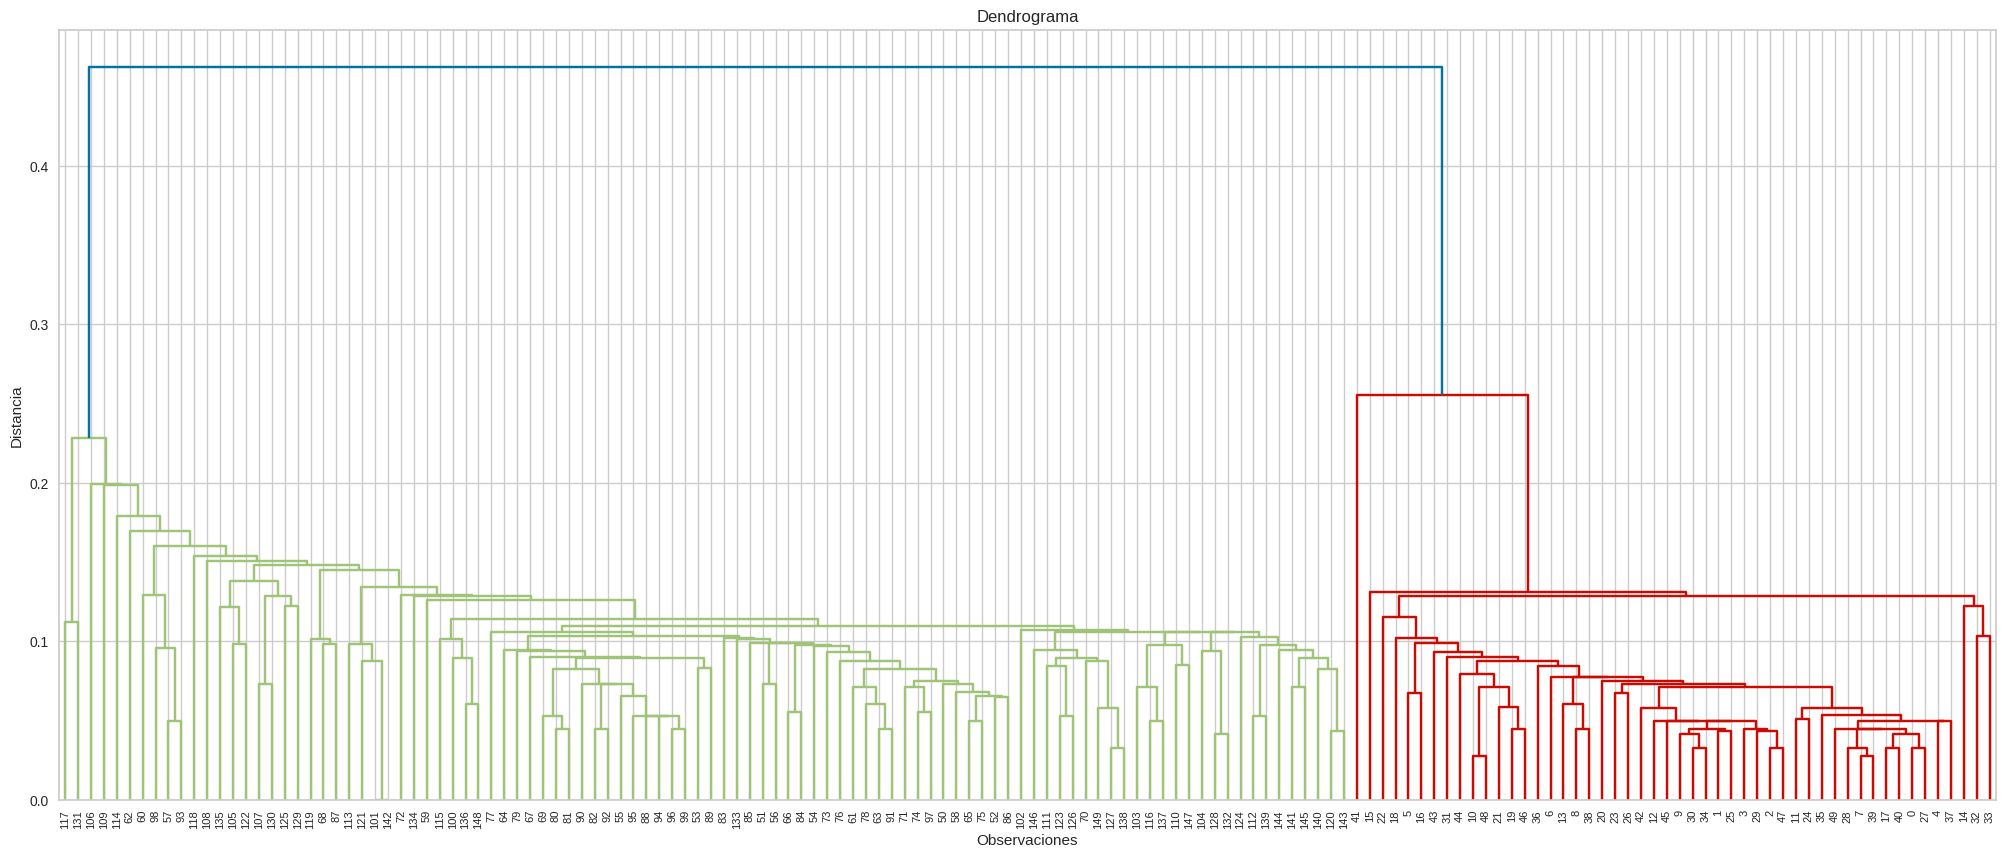

In [24]:
max_d = 7.08
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()

## Métricas de evaluación para Clustering

Las métricas mas extendidas en clustering son el método de Elbow y el Índice de Silueta.

El __método de Elbow__ consiste básicamente en verificar la evolución de la suma de los cuadrados del error para varios valores de K y verificar cual es el que brinda un mejor agrupamiento.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

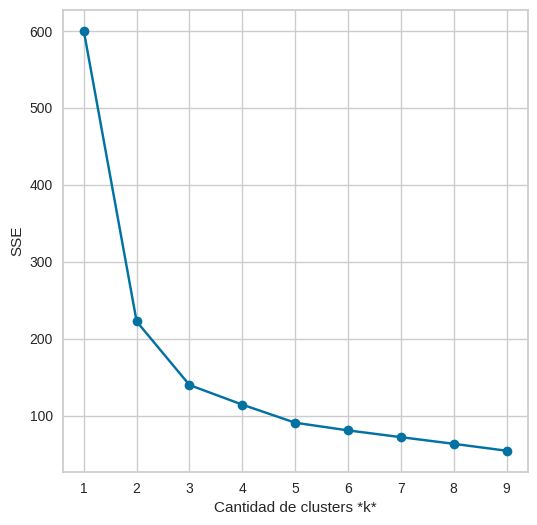

In [25]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_1)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('SSE');

Por otro lado, el __Índice de Silueta__, indica si existen o no, estructuras en los datos. <br /> <br />

A continuación graficamos el índice de silueta para 2<=k<=4:

In [26]:
from sklearn.metrics import silhouette_score

list_k = list(range(2, 5))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled_1)
    centers = clusterer.cluster_centers_

    score = silhouette_score (scaled_1, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =2 silhouette score is 0.5817500491982808
For n_clusters =3 silhouette score is 0.45937792074496625
For n_clusters =4 silhouette score is 0.38517417630641415


Y podemos graficar el gráfico de silueta, por ejemplo, para k=3:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=0))

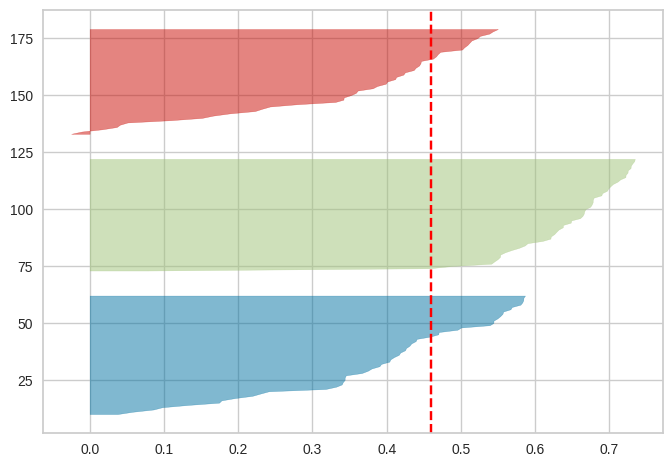

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

# Genero un modelo con K=3
model = KMeans(3, random_state=0)

# Ploteo el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(scaled_1)                                          # Entreno el visualizador con datos


## Utilizando el modelo para agrupar instancias nuevas

A partir del modelo generado, podríamos darle un nuevo caso y agruparlo en uno de los clusters generados:

In [28]:
# Elijo tres ejemplos a agrupar
ejemplos=[]
ejemplos.append(scaled_1[27,:])
ejemplos.append(scaled_1[71,:])
ejemplos.append(scaled_1[144,:])

print("El ejemplo " + str(ejemplos[0]) + " corresponde al cluster " + str(model.predict(ejemplos)[0]))
print("El ejemplo " + str(ejemplos[1]) + " corresponde al cluster " + str(model.predict(ejemplos)[1]))
print("El ejemplo " + str(ejemplos[2]) + " corresponde al cluster " + str(model.predict(ejemplos)[2]))


El ejemplo [-0.7795133   1.01900435 -1.2833891  -1.3154443 ] corresponde al cluster 1
El ejemplo [ 0.31099753 -0.59237301  0.13754657  0.13250973] corresponde al cluster 0
El ejemplo [1.03800476 0.55861082 1.10378283 1.71209594] corresponde al cluster 2


## Referencias & Recursos Web

[1] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

[2] https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html

[3] https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

[4] https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

[5] https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
